# Page View Time Series Visualizer

#### The fourth project of the "[*Data Analysis with Python*](https://www.freecodecamp.org/learn/data-analysis-with-python/)" Certification.

#### A [freeCodeCamp.org](https://www.freecodecamp.org/) course

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### The Goal

For this project we will visualize time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the [freeCodeCamp.org](https://www.freecodecamp.org/) forum from `2016-05-09` to `2019-12-03`. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

### Hands on!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!head fcc-forum-pageviews.csv

date,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


Due to the shape of our data, we consider setting the `date` column as the index of the dataframe.

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=['date'], parse_dates=['date'])

### Basic exploration

In [4]:
df.head(10)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


### Cleaning data

The first step gonna be cleaning the data by filtering out days when the page views were in the top `2.5%` of the dataset or bottom `2.5%` of the dataset.

In [7]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))
        ]

### Line chart

The first drawing gonna be a line chart of the values.

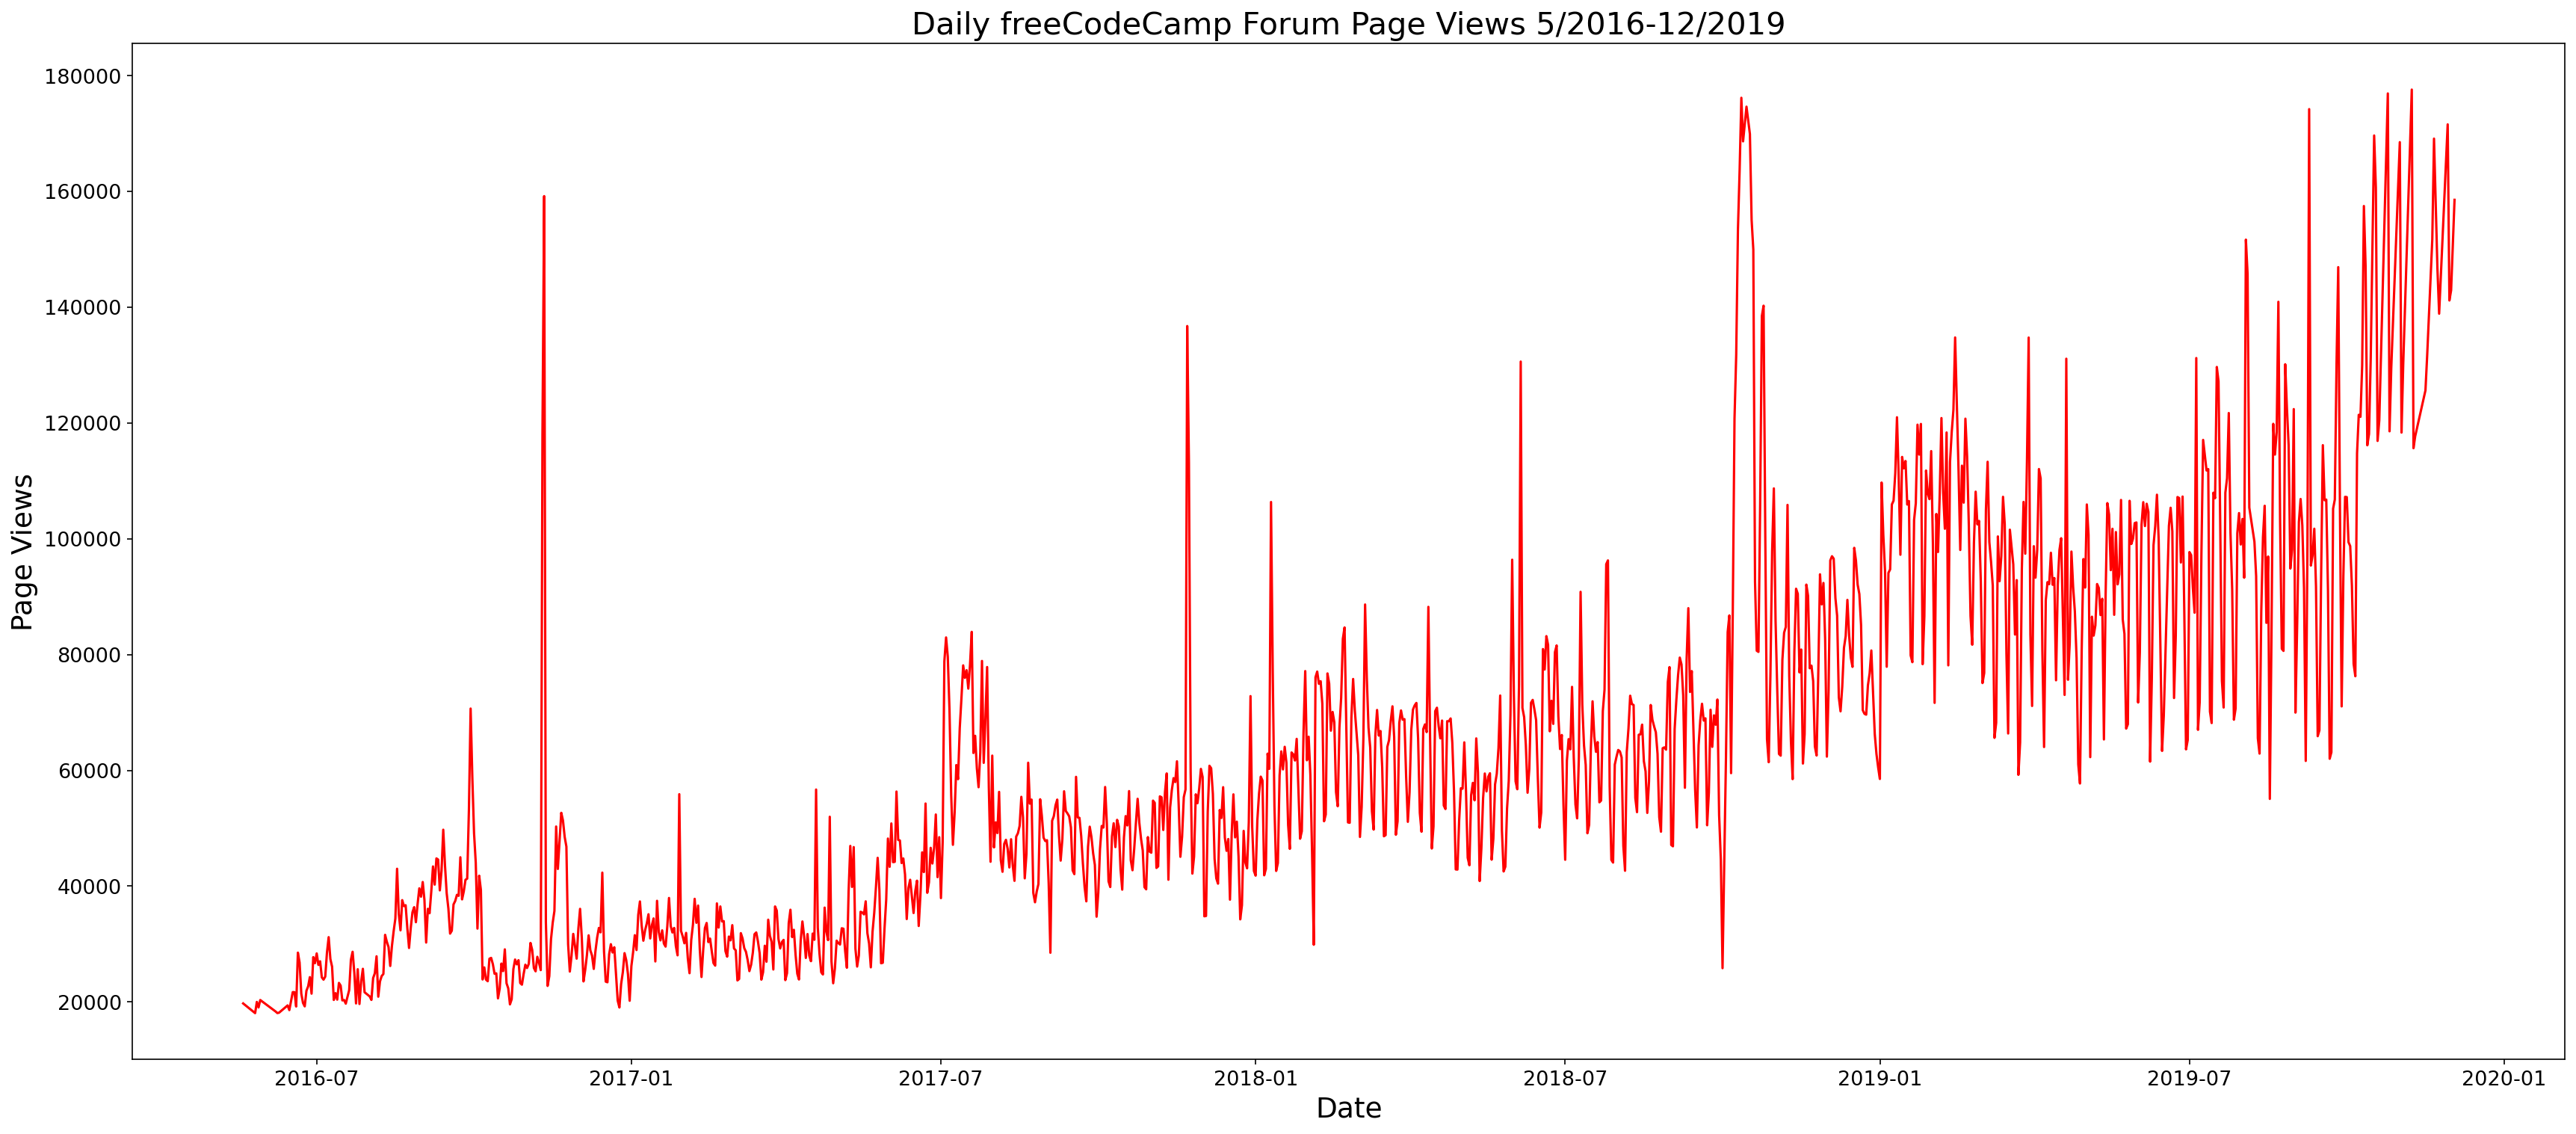

In [8]:
fig, ax = plt.subplots(figsize = (28, 12), dpi = 150)

plt.plot(df['value'], color = 'red')

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', size = 20)
plt.xlabel('Date', size = 18)
plt.ylabel('Page Views', size = 18)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.show()

### Bar plot

In this second step we gonna draw a bar chart that shows average daily page views for each month grouped by year.

First, we have to create a proper dataframe:

In [9]:
df_bar = df.copy()

df_bar["Year"] = df_bar.index.year
df_bar["Month"] = df_bar.index.month_name()

df_bar = pd.DataFrame(df_bar.groupby(["Year", "Month"], sort = False)["value"].mean())
df_bar = df_bar.reset_index()

In [10]:
df_bar.head(15)

,Year,Month,value
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


In [11]:
missing_data = {
        "Year": [2016, 2016, 2016, 2016],
        "Month": ['January', 'February', 'March', 'April'],
        "value": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])
# Due to we don't have the fourth first months of 2016, we have to add
# them as zero so that the first month of the charts is January.

And now we can draw the chart.

[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

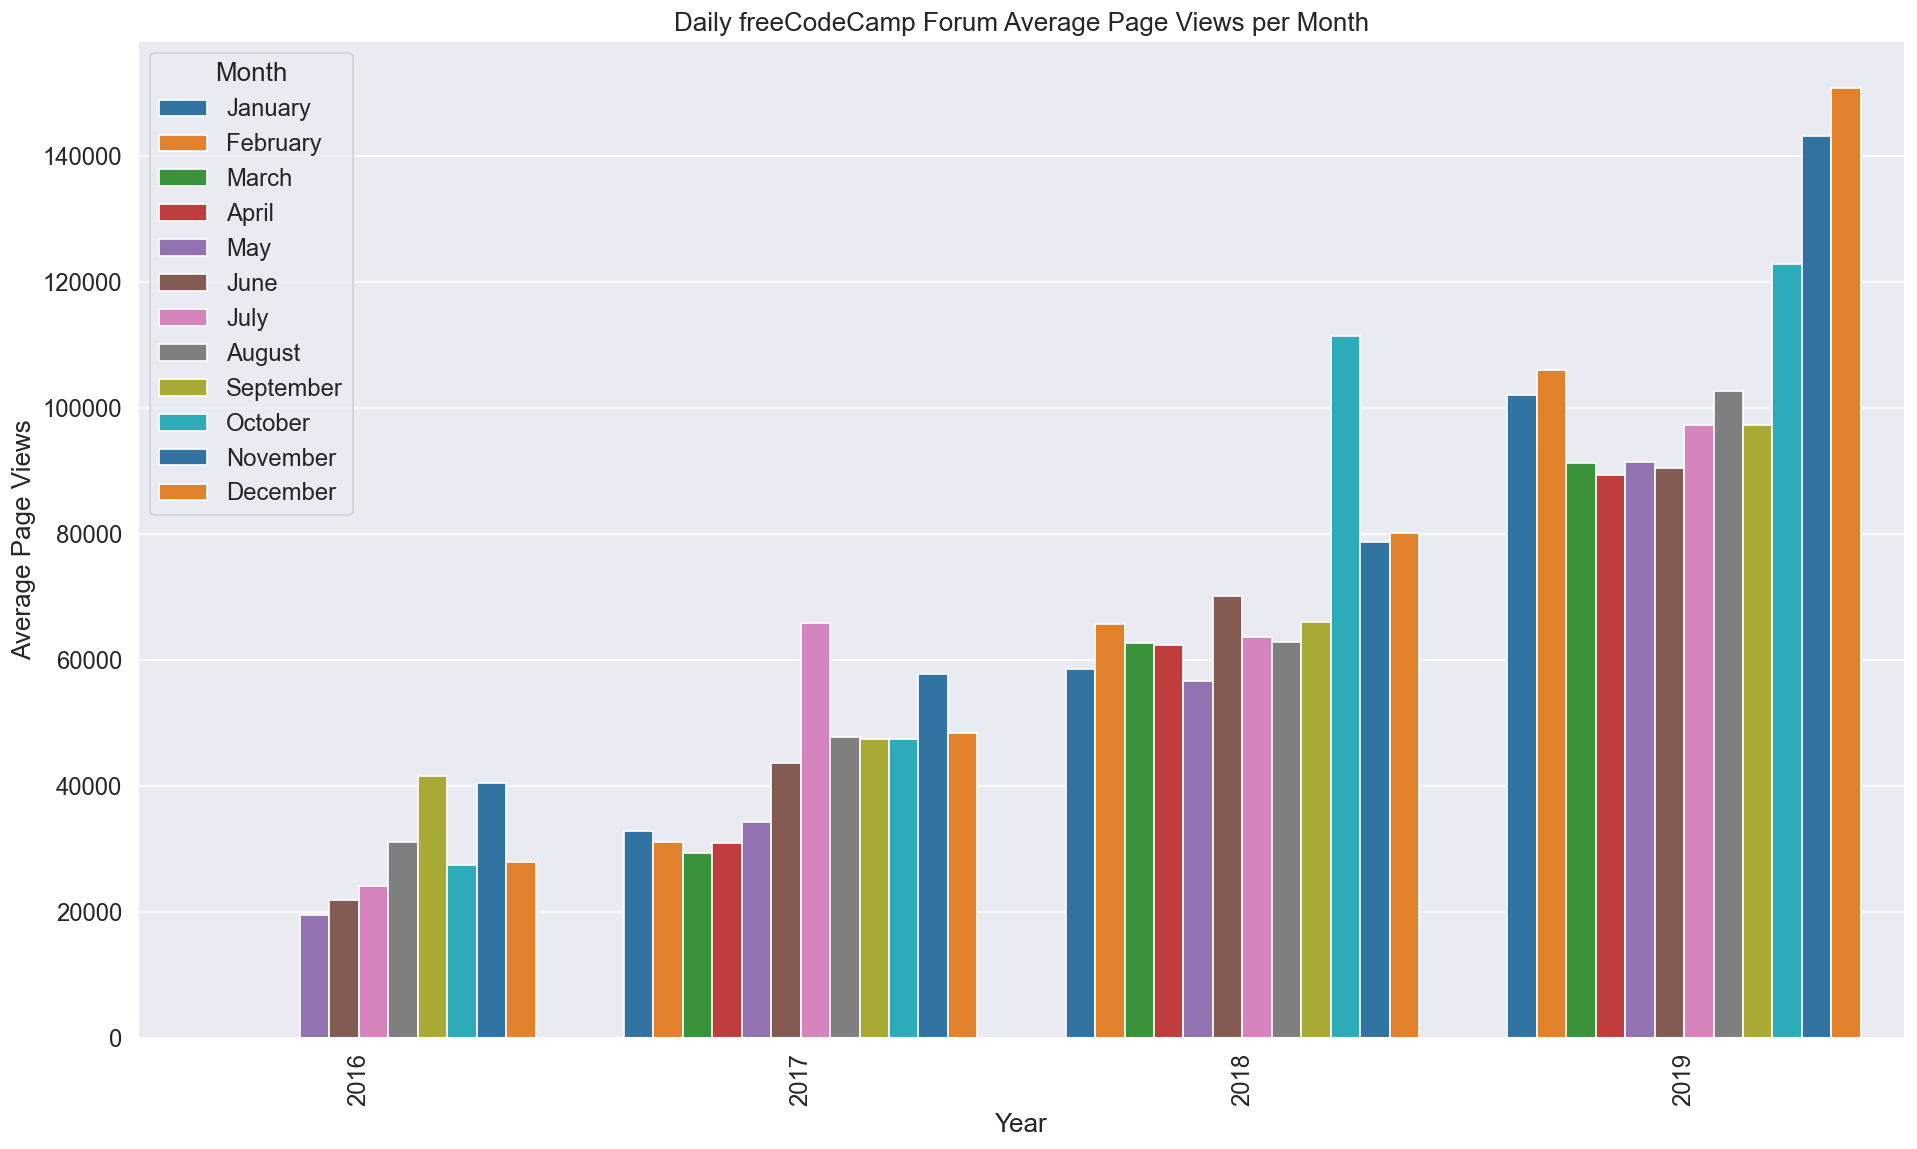

In [12]:
sns.set(font_scale = 1.3)

fig, ax = plt.subplots(figsize = (19, 11), dpi = 120)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

df_bar = df_bar.rename(columns = {"value": "Average Page Views"})

chart = sns.barplot(data = df_bar, x = "Year", y = "Average Page Views", hue = "Month", palette = "tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment = 'center')

### Box plot

The last chart we gonna do in this project consists in drawing two adjacent box plots that show how the values are distributed within a given year or month and how it compares over time.

As we did previously, the first step is to prepare data for box plots:

In [13]:
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [14]:
df_box.head(15)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun
7,2016-06-09,18139,2016,Jun
8,2016-06-14,19395,2016,Jun
9,2016-06-15,18584,2016,Jun


And finally we can draw the chart.

Text(0, 0.5, 'Page Views')

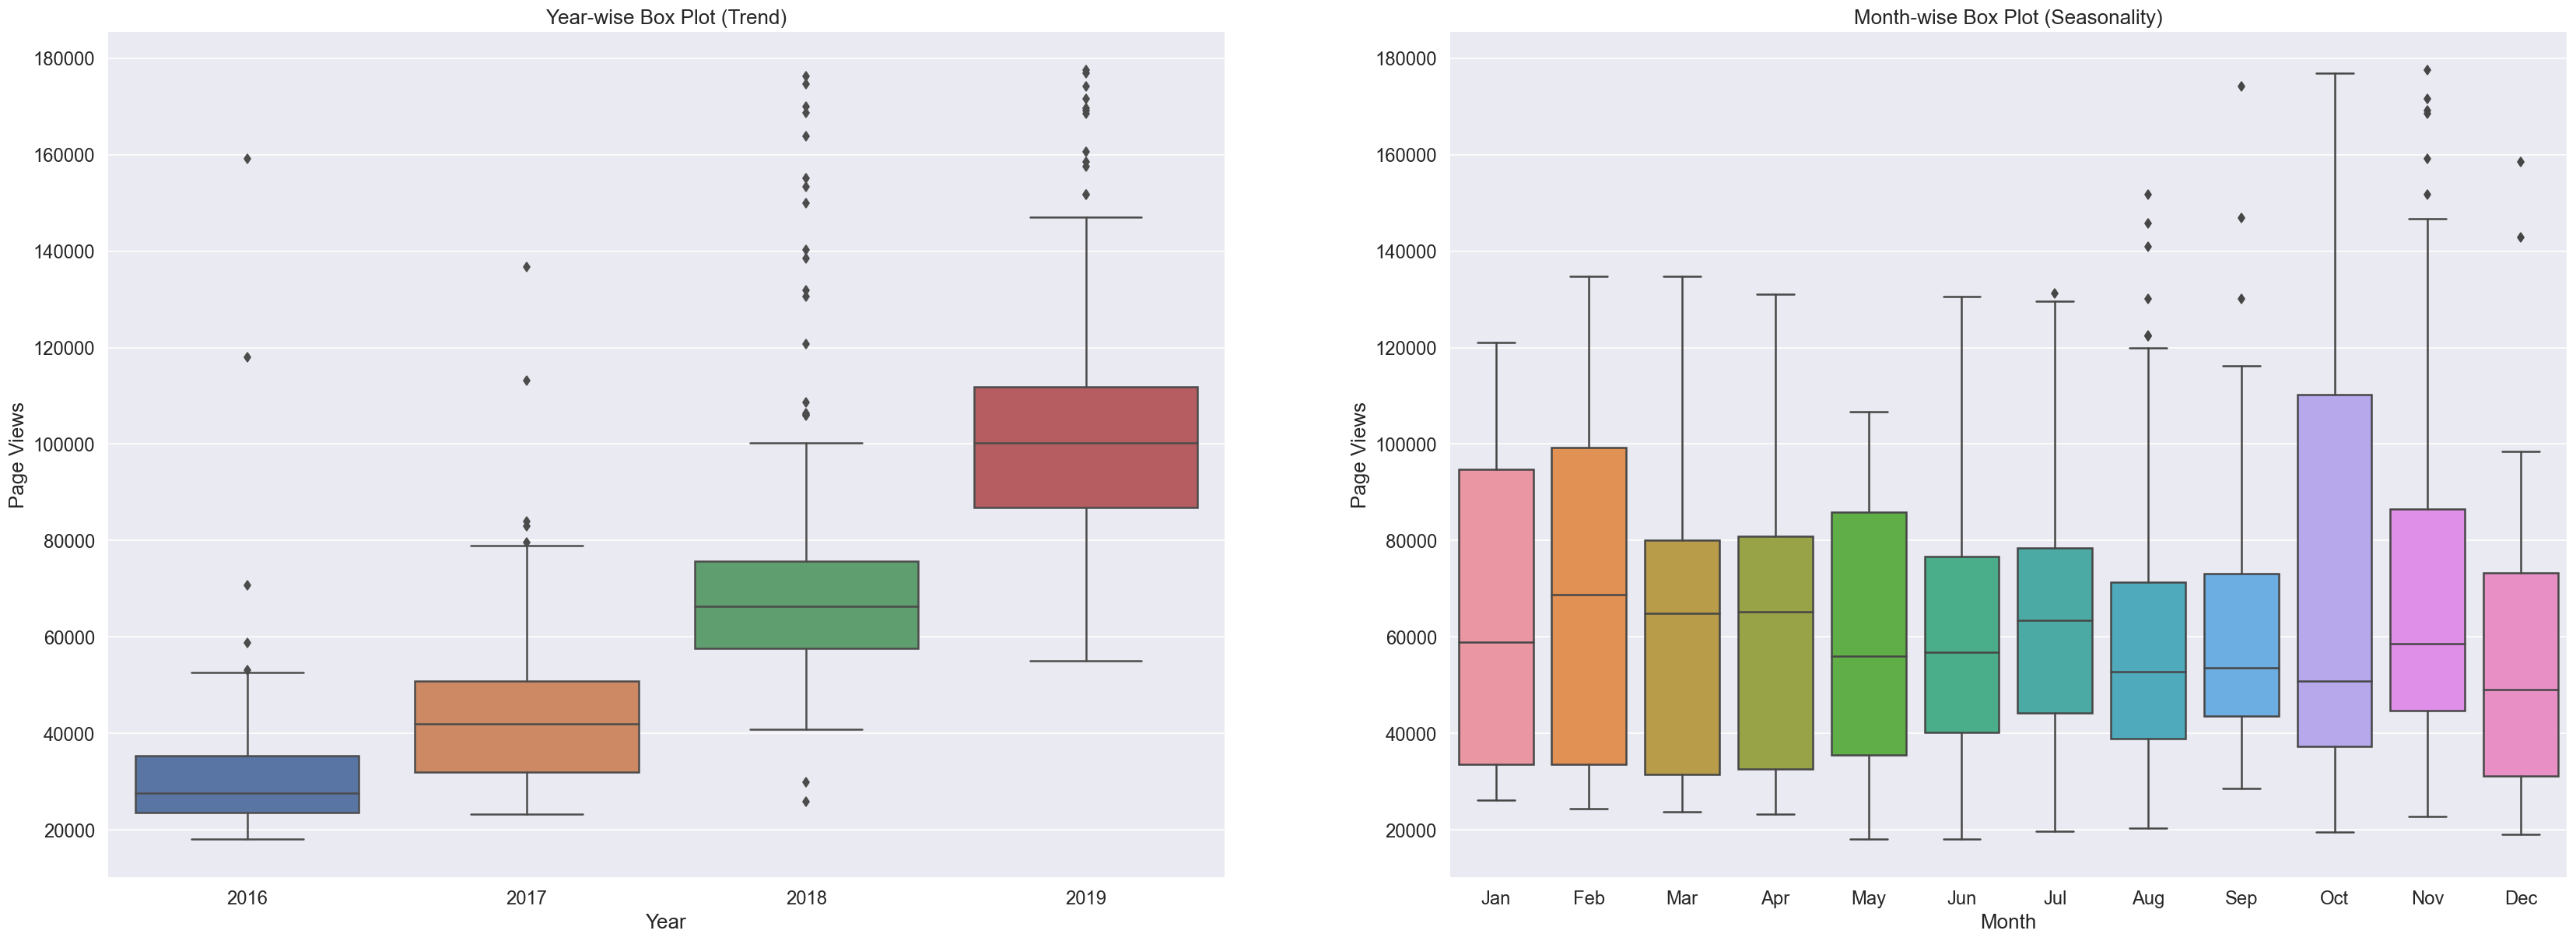

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (34, 12), dpi = 120)
    
# Yearly boxplot
sns.boxplot(data = df_box, x = "year", y = "value", ax = axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data = df_box, x = "month", y = "value", order = month_order, ax = axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

### Appendix

Now, we can submit the project using the following functions:

In [16]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (28, 12), dpi = 150)

    plt.plot(df['value'], color = 'red')

    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', size = 20)
    plt.xlabel('Date', size = 18)
    plt.ylabel('Page Views', size = 18)

    plt.xticks(size = 13)
    plt.yticks(size = 13)

    plt.show()

    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    
    df_bar = df.copy()

    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month_name()

    df_bar = pd.DataFrame(df_bar.groupby(["Year", "Month"], sort = False)["value"].mean())
    df_bar = df_bar.reset_index()

    missing_data = {
        "Year": [2016, 2016, 2016, 2016],
        "Month": ['January', 'February', 'March', 'April'],
        "value": [0, 0, 0, 0]
    }

    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    sns.set(font_scale = 1.3)

    fig, ax = plt.subplots(figsize = (19, 11), dpi = 120)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    df_bar = df_bar.rename(columns = {"value": "Average Page Views"})

    chart = sns.barplot(data = df_bar, x = "Year", y = "Average Page Views", hue = "Month", palette = "tab10")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment = 'center')

    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    fig, axes = plt.subplots(1, 2, figsize = (34, 12), dpi = 120)
    
    sns.boxplot(data = df_box, x = "year", y = "value", ax = axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data = df_box, x = "month", y = "value", order = month_order, ax = axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig('box_plot.png')
    return fig
